# Assignment
Build the AlexNet architecture and train it on the CIFAR100 dataset.

You may resize some of the kernel sizes (mainly the first one) and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224).

You may resize the number of kernels used per layer if it speeds up training and/or preserves accuracy.

Report training, validation and test errors. Which hyperparameters did you change to improve performance?

**MAKE SURE YOU USE A GPU!** Top menu select "Runtime", then "Runtime Type". Make sure "Hardware Accelerator" has the option "GPU" selected.

Tips:
- Start with only a few of a layers and check if the network can learn.
- Add layers progressively.
- Be patient: more layers and dropout can make the learning slower.
- Check the shape of the output of the model to make sure your layers and convolutions are the right size.
- The accuracy for random predictions is ~0.01.
- Favor a model that works vs reproducing the exact architecture, in case the exact architecture is too difficult to train.
- If you don't reproduce the exact architecture, that is fine. Explain what you changed and why!
- If you implement a different architecture in favor of AlexNet, report performance by AlexNet nonetheless.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
from keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import Sequential


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train_full.max()

255

In [ ]:

X_train_full = X_train_full/255
X_test = X_test/255


In [ ]:
X_train_full, y_train_full, X_validation, y_validation = X_train_full[:-7500], y_train_full[:-7500], X_train_full[-7500:], y_train_full[-7500:]

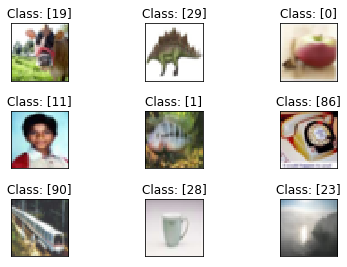

In [ ]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train_full[i], interpolation='none')
  plt.title('Class: {}'.format(y_train_full[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
class LocalResponseNormalization(keras.layers.Layer):
  """ Here is an implementation of the special layer used in the 2012 paper. """

  def __init__(self, depth_radius=5, bias=1, alpha=1, beta=0.5, **kwargs):
    super().__init__(**kwargs)
    self.depth_radius=depth_radius
    self.bias=bias
    self.alpha=alpha
    self.beta=beta

  def call(self, input):
    output = tf.nn.local_response_normalization(
        input,
        depth_radius=self.depth_radius,
        bias=self.bias,
        alpha=self.alpha,
        beta=self.beta,
        name=None)
    return output

In [ ]:
layer = LocalResponseNormalization(keras.layers.Convolution2D(256, kernel_size=(5,5), padding='valid', activation='relu'))

layer_input = Conv2D(96, kernel_size=(11, 11), padding='same', activation='relu',
        input_shape=(X_train_full.shape[1:]))

In [ ]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), padding='valid', activation='relu',
        input_shape=(X_train_full.shape[1:])))


model.add(layer=layer_input)

model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(384, kernel_size=(3, 3), padding='valid', activation='relu'))

model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 22, 22, 96)        34944     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 22, 22, 96)        1115232   
_________________________________________________________________
batch_normalization_35 (Batc (None, 22, 22, 96)        384       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 9, 9, 384)         332160    
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 7, 7, 384)         1327488   
_________________________________________________________________
batch_normalization_36 (Batc (None, 7, 7, 384)       

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=adam, metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(X_train_full, y_train_full, epochs=30, batch_size=100, validation_data=[X_validation, y_validation])

Train on 42500 samples, validate on 7500 samples
Epoch 1/30
42500/42500 [==============================] - 17s 396us/sample - loss: 4.6085 - sparse_categorical_accuracy: 0.0100 - val_loss: 4.6302 - val_sparse_categorical_accuracy: 0.0087
Epoch 2/30
42500/42500 [==============================] - 16s 375us/sample - loss: 4.6083 - sparse_categorical_accuracy: 0.0092 - val_loss: 4.6268 - val_sparse_categorical_accuracy: 0.0085
Epoch 3/30
42500/42500 [==============================] - 16s 376us/sample - loss: 4.6083 - sparse_categorical_accuracy: 0.0087 - val_loss: 4.6237 - val_sparse_categorical_accuracy: 0.0087
Epoch 4/30
42500/42500 [==============================] - 16s 376us/sample - loss: 4.6082 - sparse_categorical_accuracy: 0.0090 - val_loss: 4.6252 - val_sparse_categorical_accuracy: 0.0095
Epoch 5/30
42500/42500 [==============================] - 16s 376us/sample - loss: 4.6083 - sparse_categorical_accuracy: 0.0096 - val_loss: 4.6328 - val_sparse_categorical_accuracy: 0.0079
Epoch 

In [ ]:
history.params

{'batch_size': 100,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 42500,
 'steps': 425,
 'verbose': 0}

In [ ]:

history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [ ]:
result = model.evaluate(X_test,y_test,verbose=0)
print(result)

[4.606596604919433, 0.01]


In [ ]:
model.predict(X_test)

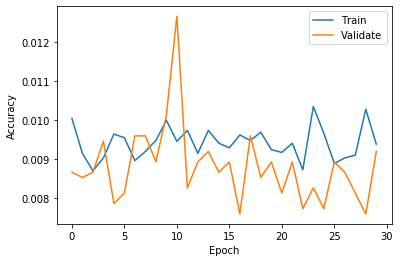

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()

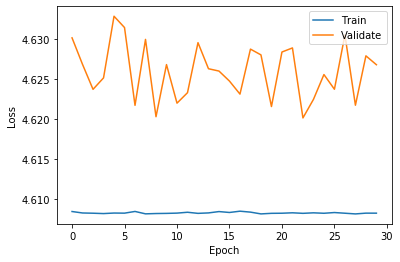

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()

Honestly this is one ugly looking model.  I truly do not know where I went wrong. I tried following the Alexnet hiearchy to the tee.  I spent hours trying to optimize it.  At first I thought it was due to learning rate being too fast or too slow however when I increase or decrease it I see the same stagnation for the loss.  

Perhaps I didnt implement the normalization layer properly? Or because I used Sequential model over Functional? 

It is evident I am missing something.  Could you please give feedback to stir me in the right direction? I want to be efficient at creating models.

Thank you and have a wonderful day.
